## Introduction to Neural Network

### What is a Neural Network (NN) ?
* [Link for neuron network mathematic derivation](http://htmlpreview.github.io/?https://github.com/yuanDataScience/Machine_Learning_R/blob/master/NeuralNetworksLearning/Neural_Networks_Learning.nb.html)
* [Link for logistic regression mathematic derivation](http://htmlpreview.github.io/?https://github.com/yuanDataScience/Machine_Learning_R/blob/master/LogisticRegression/LogisticRegression.nb.html)
* single neuron == linear regression without applying activation (perceptron)
* a signle neuron will calculate weighted sum of input and then we can set a threshold to predict output in a perceptron. If weighted sum of input cross the threshold, perceptron fires and if not, then perceptron doesn't predict
* perceptron can take real values or boolean value inputs. When weighted sum is zero, perceptron output zero
* disadvantage of perceptron: only output binary values and if we try to gvie small change in weight and bias then perceptron can flip the output. We need some system whcih can modify teh output slightly according to small change in weight and bias. Here comes sigmoid function in picture
* Sigmoid activation function allows us to make slight change in output
* If we apply sigmoid activation function then single neuron will act as logistic regression
* RELU stands for rectified linear unit. It is the most popular activation function right now that makes deep NNs train faster now
* Hidden layers predicts cnnection between inputs automatically, thats what deep learning is good at
  + Each input is connected to the hidden layer and the NN will decide the connectios. Deep NN consists of more hidden layers (Deep layers)
  
* Why is deep learning taking off?
  + deep learning is taking off for 3 reasons
    + data
      + for small data NN can perform as linear regression or SVM
      + for big data a small NN is better than SVM
      + for big data a big NN is better than a medium NN, which is better than small NN
      + we have more data because the world is using the computer a little bit more
    + computation:
      + GUPs
      + powerful CPUs
      + distributed computing
      + ASICs
    + Algorithm
      + creative algorithms that changed the way NN work
      + RELU is much better than sigmoid function in training a NN because it helps with the vanishing gradient problem

* Notations
  + M is the number of training vectors
  + Nx is the size of the input vector
  + Ny is the size of the output vector
  + x(1) is the first input vector
  + y(1) is the first output vector
  
* Logistic regression
  + refert to [Link for logistic regression mathematic derivation](http://htmlpreview.github.io/?https://github.com/yuanDataScience/Machine_Learning_R/blob/master/LogisticRegression/LogisticRegression.nb.html) for detailed information about logistic regression
  + sigmoid(w^T X)  + b
  + cost function
    + don't use square root error (y', y) = 1/2 (y'- y) ^2, since it is non convex (contains local optimum)
    + use likelyhood L(y', y) = -(ylog(y') + (1-y)log(1-y')) as loss function
    + cost function is J(w, b) = (1/m) Sum(L(y'(i), y(i))
    + The cost function computes the error for a single training example; the cost function is the average of the loss functions of the entire training set
  + gradient decent
    + w = w - alpha d(J(w, b) /dw)
    + b = b - alpha d(J(w, b)/ db)
  + chain rule
    + if x -> y -> z (x effects y and y effects z) then d(z)/d(x) = d(z)/d(y) \* d(y)/d(x)
    
### Neuron network 
 * Neuron network
   + refer to * [Link for neuron network mathematic derivation](http://htmlpreview.github.io/?https://github.com/yuanDataScience/Machine_Learning_R/blob/master/NeuralNetworksLearning/Neural_Networks_Learning.nb.html) for detailed information about NN
   
* Activation functions   
   + tanh A = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z)) usually works better than sigmoid activation function for hidden units because the mean of its output is closer to zero, and so it centers the data better for the next layer
   + sigmoid and tanh functions have the disadvantage that if the input is too small or too large, the slope will be near zero which will casue us the gradient decent problem
   + one of the popular activatio functio is RELU. RELU = max(0, z). If z is negative the slope is zero and if z is positive the slope remains linear
   + If your classification is between 0 and 1, use the output activation as sigmoid and the others as RELU
   + in NN you will decide a lot of choices like
     + number of hidden layers
     + number of neurons in each hidden layer
     + learning rate (The most important parameter)
     + Activation functions
     + others
   + there is no guide lines for that. You should try all activation functions, for example  
   
* derivation of activation functions
  + g'(z) = g(z) (1-g(z)), if g(z) is sigmoid function
  + g'(z) = 1- g(z)^2, if g(z) is tanh
  + g'(z) = { 0 if z < 0 
              1 if z > = 0) if g(z) is RELU

* Gradient decent algorithm
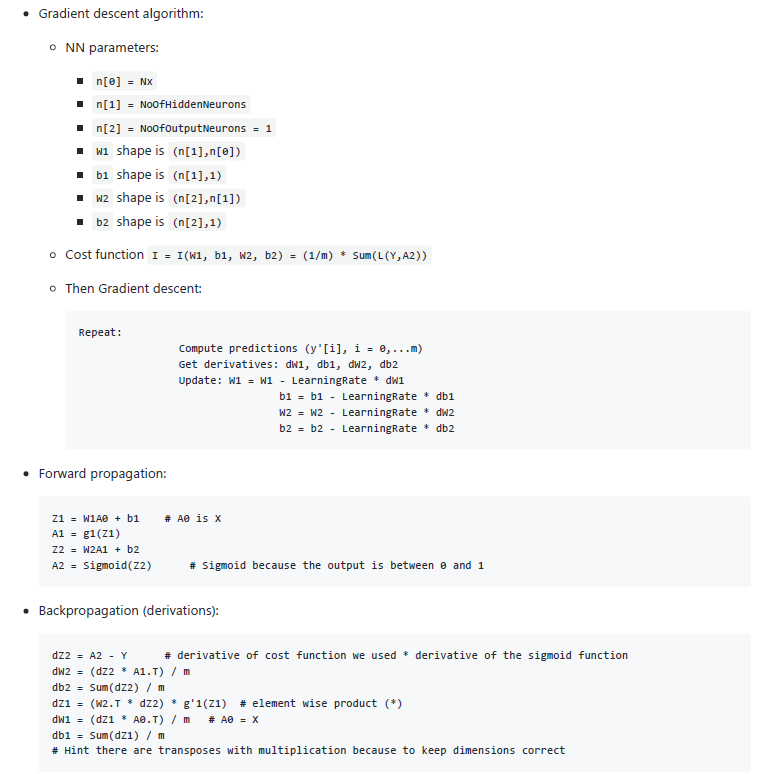
              
* Random initialization
  + in logistic regression it wasn't important to initialize the weights randomly, while in NN we have to initialize them randomly
  + if we initialize all the weights with zeros in NN it won't work (initializing bias with zero is OK)
    + all hidden units will be completely identical (symmetric) - compute exactly the same function
    + on each gradient descent iteratoin all the hidden units will always update the same
  + To solve this we initialize the W's with a small random numbers
    + We need small values because in sigmoid/tanh, if the weight is too large you are more likely to have very large values of Z even at the very start of training, which saturated the activation functions. If you don't use any sigmoid or tanh activation functions throughout the neural network, this is less of an issue.
    + constant 0.01 is all right for 1 hidden layer networks, but if the NN is deep this number can be changed but it will always be a small number
  
### Deep Neural Networks
* Deep L-layer neural network
  + shallow NN is a NN with one or two layers
  + deep NN is a NN wit three or more layers
  + we will use L to denote the number of layers in a NN
    + n\[l\] is the number of neurons in a special layer l
    + n\[0\] is the number of neurons input layer. n\[L\] denotes the number of neurons in output layer
    + g\[l\] is the activation function
    + a\[l\] = g\[l\](z\[l\]) 
    + w\[l\] weights is used for z\[l\]
    + x = a\[0\], a\[1\] = y'
  + based on these notations, we will have
    + A vector n of shape(1, number of layers + 1), from layer 0, which is input to L
    + A vector g of shape(1, number of layers) activation functions start from layer 1
    + A list of different shapes w based on the number of neurons on the previous and current layer
    + A list of different shapes b based on the number of neurons on the current layer

* Forward propagation in a deep network
  + forward propagation general rule for m inputs                   
  `Z[l] = W[l]A[l-1] + B[l]
  A[l] = g[l](A[l])`
  
  + we can't compute the whole layers forward propagation without a for loop so its OK to have a for loop here
  + the dimensions of the matrices are so important you need to figure it out
  
* Getting your matrix dimensions right
  + The best way to debug your matrices dimensions is by a pencil and paper
  + Dimension of W is `(n[l], n[l-1])`. Can be thought by right to left
  + Dimension of b is `(n[l], 1)`
  + dw has the same shape as W, while db is the same shape as b
  + Dimension of `Z[l], A[l], dz[l]`, and `dA[l]` is `(n[l], m)`
  
* Why deep representations?
  + why deep NN works well?
  + Deep NN makes relations with data from simpler to complex. In each layer it tries to make a relation with the previous layer. E.g.:
    + Face recognition application:
      + image ==> Edges ==> Face parts ==> Faces ==> desired face
    + Audio recognition application:
      + Audio ==> Low level sound features like (sss, bb) ==> Phonemes ==> Words ==> Sentences
  + informally, funtions that small L-layer deep neural networks can compute require exponentially more hidden units to compute by shallower networks
  + when starting on an application don't start directly by dozens of hidden layers. Try the simplest solutions (e.g. Logistic regression), then try the shallow neural network and so on
  
* matrix calculations for forward and backward propagation
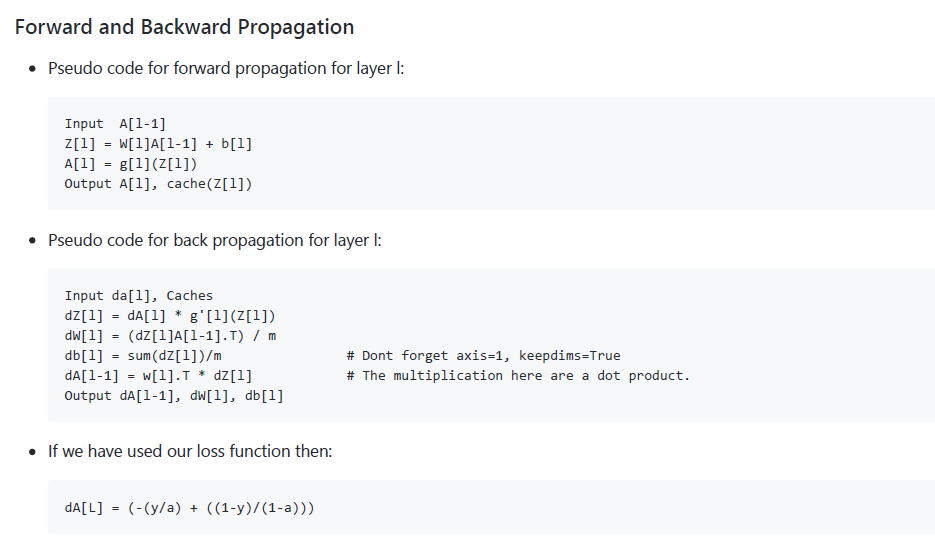

* Parameters and hyperparameters
  + main parameters of NN is w and b
  + hyper parameters (parameters that control the algorithm0 are
    + learning rate
    + number of iteration
    + number of hidden layers L
    + Number of hidden units n
    + choice of activation functions
    

## Practical Aspects of Deep Learning

### Train / Dev / Test sets
* It is impossible to get all your hyperparameters right on a new application from the first time
* THe idea is to go through the loop Idea ==> Code ==> Experiment
* You have to go through the loop many times to figure out your hyperparameters
* Split data into three parts
  + training set (the largest set)
  + hold-out cross validation set / Development or "dev" set
  + Testing set
* The basic idea is to build a model upon training set then optimize hyperparameters on dev set, then try and evaluate the testing set
* ratio of splitting
  + if the size of dataset is 100 to 1000, 000 ==> 60/20/20
  + if the size is > 1000,000 ==> 98/1/1 or 99.5/0.25/0.25
* make sure the dev and test are coming from the same distribution
  + if cat training picture is from the web and the dev/test pictures are from users cell phone there will be mismatch. It is better to make sure that deva and test sets are from the same distribution
* the dev set rule is to try them on some of the good models you've created
* Its OK to only have a dev set without a testing set. But a lot of people in this case call the dev set as the test set. A better terminology is to call it a dev set as its used in the development

### Bias / Variance
* Bias / Variance techniques are easy to learn, but difficult to master
* Bias / Variance
  + if your model is underfitting (logistic regression of non linear data, for example), it has high bias
  + if your model is overfitting, it has a high variance
  + your model will be all right if you balance the bias/variance
* Examples of bias / variance
  + high variance (overfitting)
    + training error: 1%
    + dev error: 11%
  + high bias (underfitting)
    + training error: 15%
    + dev error: 14%
  + high bias and high variance
    + training error: 15%
    + dev error: 30%
  + best
    + training error: 0.5%
    + dev error: 1%
  + These are based on the assumption that human has 0% error. If the problem isn't like that you'll need to use human error as baseline
  
### Basic recipe for machine learning
* if your algorithm has a high bias
  + make your NN bigger such as the size of hidden units, number of layers
  + try a different model that is suitable for your data
  + try to run it longer
  + different (advanced) optimization algorithms
* if your algorithm has a high vairance
  + more data
  + try regularization
  + try a different model that is suitable for your data
* try the recipes to reduce high bias and high variance until you hava a low bias and low variance
* In the old days before deep learning, there was a bias/variance trade off, but since we have more options/tools for solving the bias and variance problem its really helpful to use deep learning
* training a bigger neural network never hurts

### Regularization
* adding regularization to NN will help it reduce variance (overfitting)
* L1 matrix norm
  + sum of absolute values of all w 
  + ||W|| = sum(|w(i, j)|)
* L2 matrix norm
  + sum of all w squared 
  + ||W||^2 = sum(|w(i, j)|^2
* regularization for logistic regression
  + The normal cost function that we want to minimize is: J(w,b) = (1/m) * Sum(L(y(i),y'(i)))
  + The L2 regularization version: `J(w,b) = (1/m) * Sum(L(y(i),y'(i))) + (lambda/2m) * Sum(|w[i]|^2)`
  + The L1 regularization version: `J(w,b) = (1/m) * Sum(L(y(i),y'(i))) + (lambda/2m) * Sum(|w[i]|)`
  + The L1 regularization version makes a lot of w values become zeros, which makes the model size smaller.
  + L2 regularization is being used much more often.
  + lambda here is the regularization parameter (hyperparameter)
    
* regularization for NN
  + in NN, we have a number of weight vectors (one weight vector for each hidden unit)
  + we get the dot product of these weight vectors by themselves, sum them and sqrt on the sum
  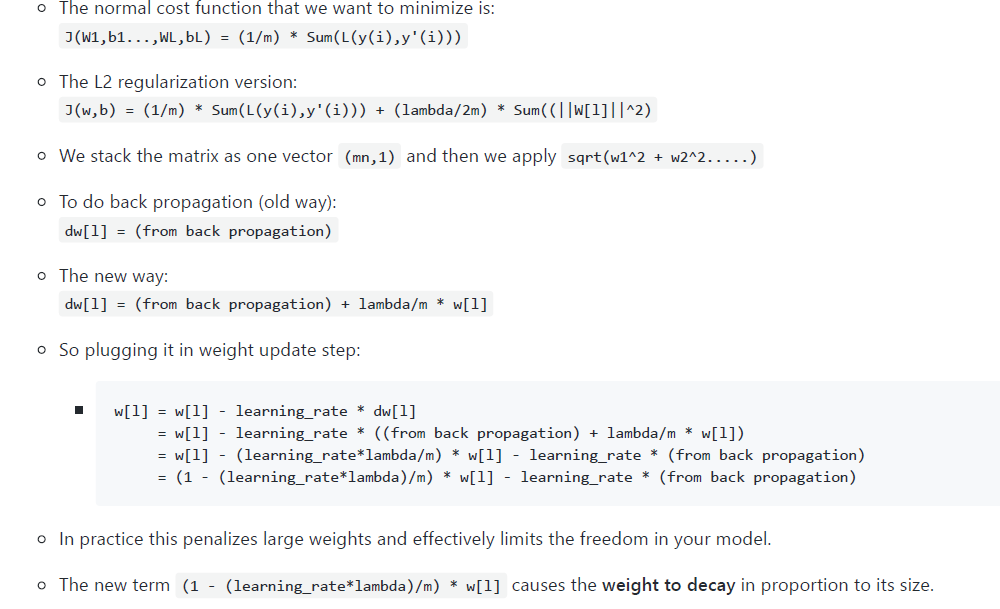
  + implementation tip
    + if you plot the cost function J as a function of the number of iterations of gradient descent, the cost function J decreases monotonically after each iteration of gradient descent with regularization. If you plot the cost function without regularization, you may not see it decrease monotonically
    
* Dropout Regularization
  + in most cases, use L2 regularization
  + dropout regularization eliminates some neurons/weights on each iteration based on a probability
  + A most common technique to implement dropout is called "inverted dropout"
  + code for inverted dropout
    + note that we need to divide the resulting elements in as by 0.8 to solve the scaling problem
  ``` python
    keep_prob = 0.8 # 0 <= keep_prob <= 1
    l = 3 # this code is only for layer 3
    # the generated number that are less than 0.8 will be dropped. 80% stay, 20% dropped
    d3 = np.random.rand(a[l].shape[0], a[l].shape[1]) < keep_prob
    a3 = np.multiply(a3,d3) # keep only the values in d3
    # increase a3 to not reduce the expected value of output
    # (ensures that the expected value of a3 remains the same) - to solve the scaling problem
    a3 = a3 / keep_prob
  ```  
    + vector `d[l]` is used for both forward and back propagation and is the same for them, but it is different for each iteration (pass) or training example
    + we don't use dropout at test time, since it will add noise to the predictions in test time
    + dropout has a similar effect to L2 regularization. It uses a smaller NN by dropping out some weights. In addition, it reduces the dependencies on specific weights/nerons/features during the training
    + each layer can have a differnt keep\_prob value. If you think some layers are more overfitting, set a lower prob threshold value to drop more weights/features
    + the input layer dropout has to be near 1 since we don't want to eliminate a lot of features
    + a lot of researchers are using dropout with computer vision because they have a very big input size and almost never have enough data, so overfitting is the usual problem.
    + you need to turn off dropout when trouble shooting the system
    
* Other regularization methods
  + data augmentation
    + increase the training dataset size by flipping pictures horizontally, or applying a random position and rotation to an image
    new data obtained by this technique is not as good as the real independent data, but still can be used as a regularization technique
  + early stopping
    + plot the training set and the dev set cost together for each iteration. At some iteration the dev set cost will stop decreasing and will start increasing
    + pick the point at which the training set error and dev set error are best (lowest training cost with lowest dev cost), and take these parameters as the best parameters
    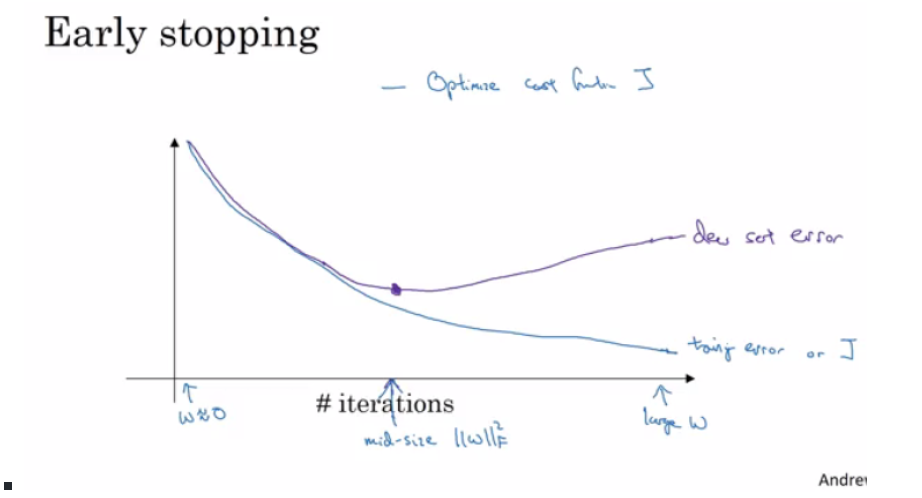
    + advantage
      + don't need to search a hyperparamter like in other regularization approaches
    + disadvantage
      + try to minimize cost function and reduce overfitting at the same time, with these two goals orthogonal to each other
  + model ensembles
    + algorithm
      + train multiple independent models
      + at test time average their results
    + can get you extra 2% performance
    + reduces the generalization error
    + can use some snapshots of NN at the training, ensembles them and take the results
* Normalizing inputs
  + if you normalize your inputs this will speed up the training process a lot
  + Normalization are going on these steps:
    + get the mean of th training set: `mean = (1/m) * sum(x(i))
    + subtract the mean from each input: `X = X - mean`
      + this makes your input centered around 0
    + get the variance of the training set after centered: `variance = (1/m) * sum(x(i)^2)`
    + normalize the variance `X /= variance`
  + These steps should be applied to training, dev, and testing sets (but using mean and vaiance of the train set)
  + why normalize?
    + if we don't normalize the inputs our cost function will be deep and its shape will be incosistent( elongated) then optimizing it will take a long time to oscilate to the optimum using gradient descent
    + If we normalize it the opposite will occur. The shape of the cost function will be cnsistent (look more symmetric like circle in 2D example) and we can use a larger learning rate alpha - the optimization will be faster
    + see the picture below for the illustration
    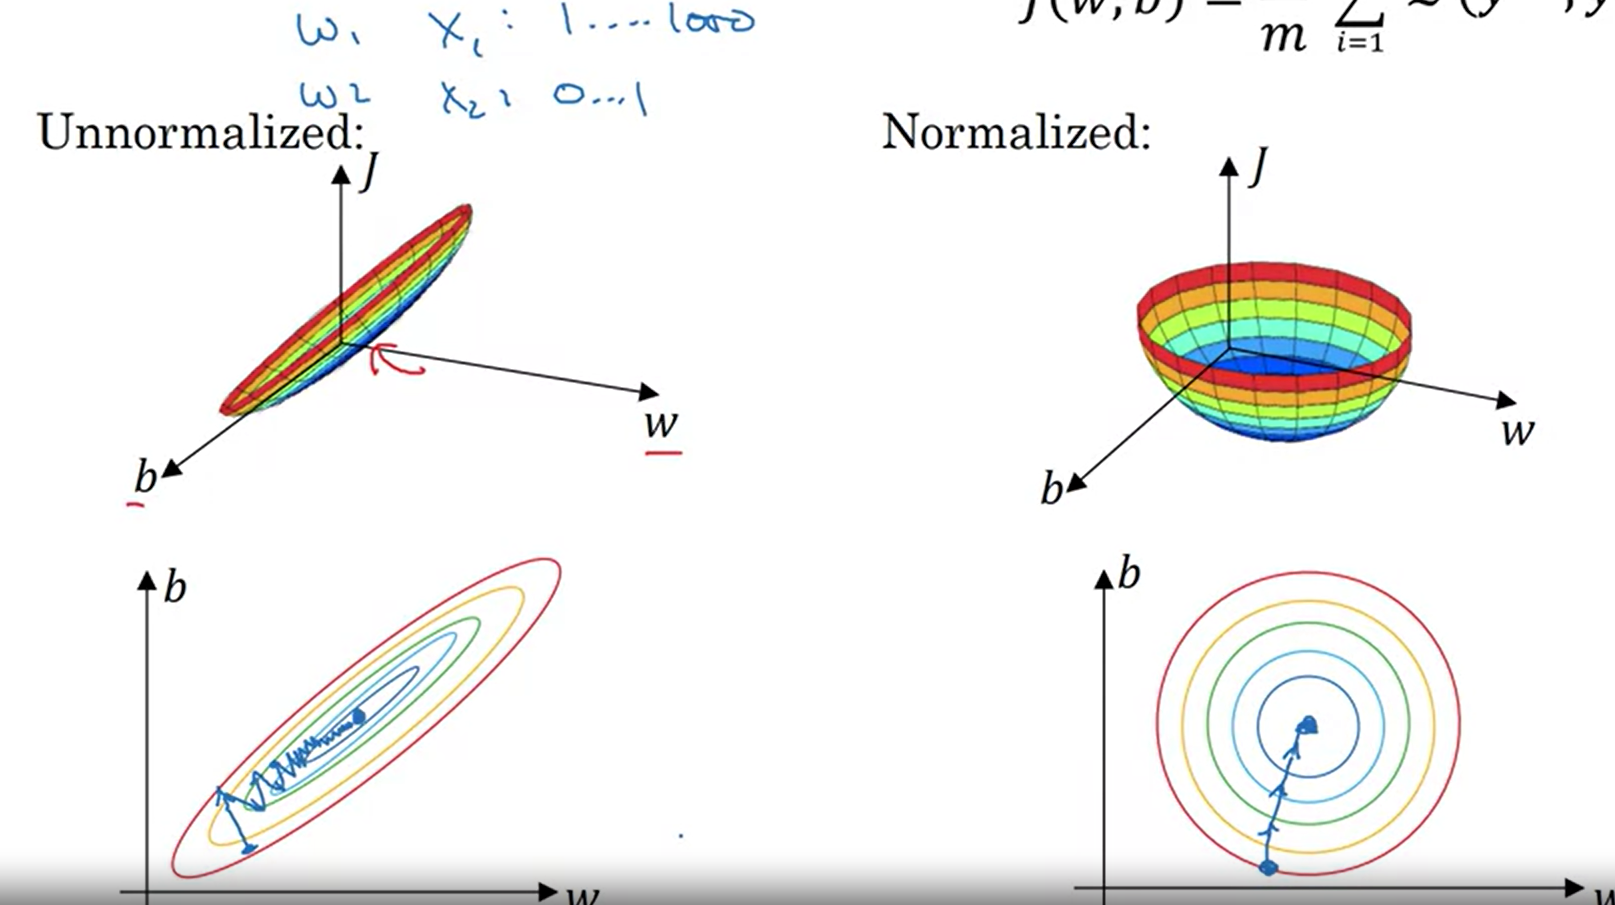
    
* Vanishing / Exploding gradients
  + The vanishing / exploding gradients occurs when your derivatives/weights become very small or very big
  + this occurs to deep networks since the activation can be exponentially increases or decreases based on weights. If the weight matix is a little bit bigger than or smaller than identity, this can result in very small activation values over large amount of layers
  + especially when activation value is very small, the gradient descent will take a long tiem to learn
  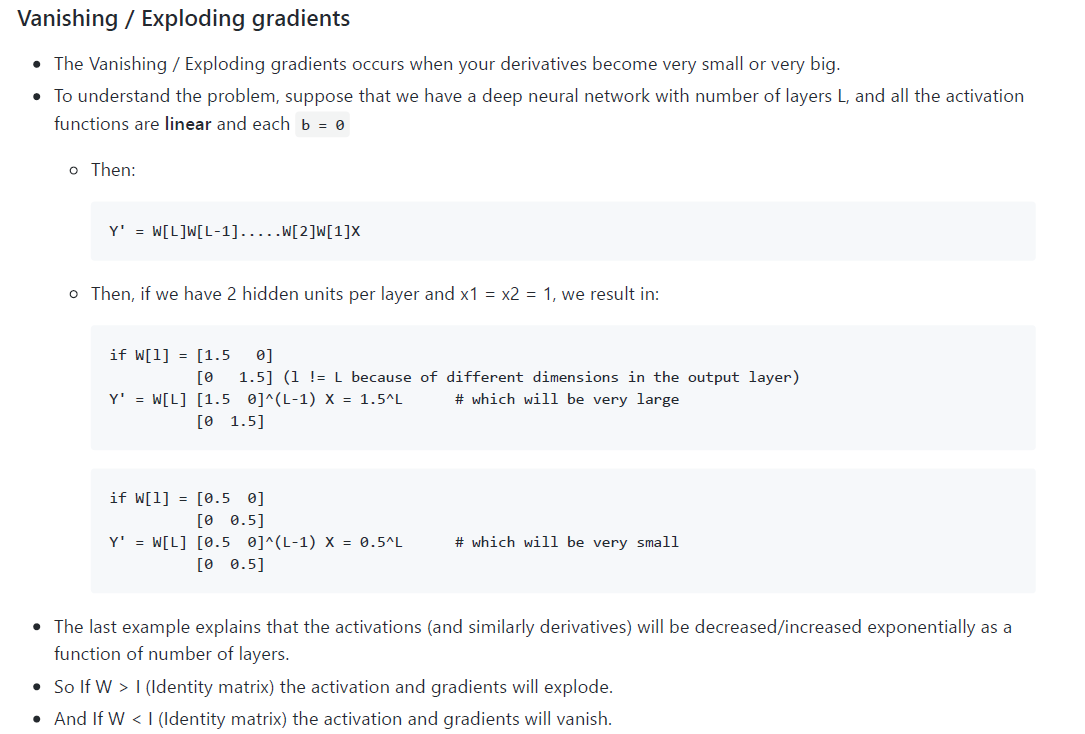
  
* Weight initialization for Deep Networks
* A partial solution to the vanishing / exploding gradients in NN is better or more careful choice of the random initialization of weights
* we can initialize the weights (W's) to be smaller to not explode the cost over the n layers of NN
  + a simnple solution is to control the variance, which equals `1/n_x` to be the range of Ws
  + we can set the initialization part inside sqrt to be `2/n[l-1]` for ReLU as
  `np.random.rand(shape) * np.sqrt(2/n[l-1])`
  
* Numeric approximation of gradients
  + gradient checking is used to tell you if your implementation of backpropagation is correct.
  + this is done by sequentially change each element in the concatenated vectors of `W[i]` and `b[i]`, and calculate the cost function change vs the change in the corresponding element
  + procedure
    + take `W[1], b[1], ..., W[L], b[L]` and reshape them into one big vector (theta) by concatenation 
    + sequentially change each of the element in theta, and caluclate the cost function change caused by a small change, esp, in each element of the vector, and then calculate the derivative of cost function due to the change. After iterating each element, we get the derivative for the entire concatenated vector. This is our `d_theta_aprox`
    + take `dW[1], db[1], ..., dW[L], db[L]` into one big vector (`d_theta`). This is the concatenated derivative vector obtained by back propagation, and is our `d_theta` 
    + we then compare the two versions of the derivative vectors and see if they are consistent. This is done by comparing the fraction of the norm1 difference between `d_theta_aprox` and `d_theta` and the sum of their norm1, which should be < 10^-7. A more detailed description of the procecure is below:
    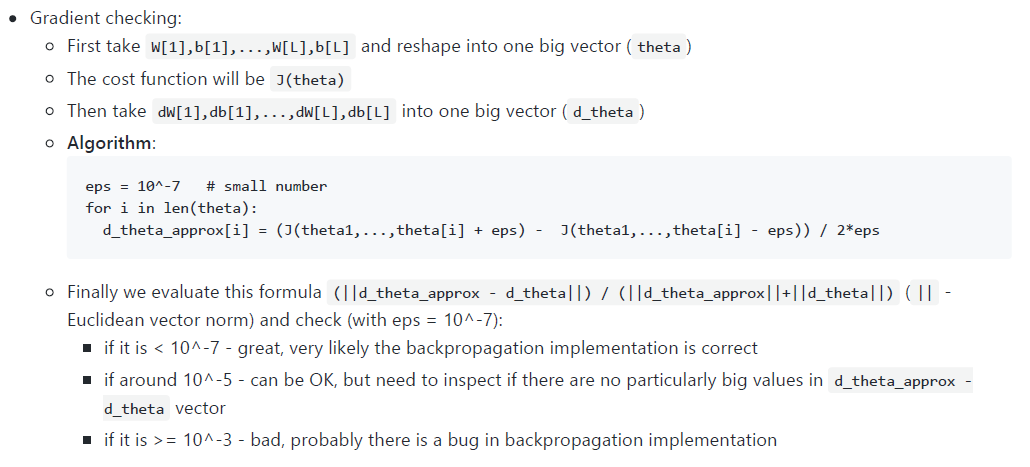
    
* Initialization summary
  + The weights W should be initialized randomly to break symmetry
  + It is however okay to initialize the biases b to zeros. Symmetry is still broken so long as W is initialized randomly
  + Different initializations lead to different results
  + Random initialization is used to break symmetry and make sure different hidden units can learn different things
  + Don't intialize to values that are too large
  + He initialization works well for networks with ReLU activations.
  
* What is L2-regularization actually doing?
  + L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes.


### Optimization Algorithms
#### Mini-batch gradient descent
* split the training dataset (eg. 50 million) into mini batches of size 1000
* in batch gradient descent, we run the gradient descent on the whole dataset
  + for large dataset, it will take a long time since we can not load entire dataset into memory
* in mini-batch gradient descent, we run the gradient descent on the mini datasets
* mini-batch algorithm pseudo code:
```python
    for t = 1:No_of_batches # this is called an epoch
    AL, caches = forward_prop(X{t}, Y{t})
    cost = compute_cost(AL, Y{t})
    grads = backward_prop(AL, caches)
    update_parameters(grads)
```
* the code inside an epoch should be vectorized
* mini-batch gradient descent works much faster in the large datasets
* Mini-batch size:
  + ( mini batch size = m ) ==> Batch gradient descent
    + too long per iteration
  + ( mini batch size = 1 ) ==> Stochastic gradient descent (SGD)
    + too noisy regarding cost minimization (can be reduced by using smaller learning rate)
    + won't ever converge (reach the minimum cost)
    + loose speed up from vectorization
  + ( mini batch size = between 1 and m ) ==> Mini-batch gradient descent
    + fast learning
      + have the vectorization advantages
      + make progress without waiting to process the entire training set
    + doesn't always exactly converge (oscelates in a very small region, but can reduce learning rate)
  + guidelines
    + for small training set (< 2000 examples), use batch gradient descent
    + batch size must be a power of 2
    + make sure mini-batch fits in CPU/GPU memory
    + mini-batch size is a hyperparameter
   
#### Exponentially weighted averages
* general equation
`V(t) = beta * v(t-1) + (1-beta) * theta(t)` where theta(t) is the value at time t
  + beta controls how many previous items we want to integrate into the average
    + beta = 0.9, average last 10 entries
    + beta = 0.98, average last 50 entries
    + beta = 0.5, average last 2 entries
  + usually use beta between 0.9-0.98  
* to correct the effect of v(0) = 0, which is a virtual variable, we use a corrected format of the general equation as to reduce the contribution of v(0) to the early points of v(i). With the increase of t, the correction item (1 - beta^t) is close to 1
`v(t) = (beta * v(t-1) + (1-beta) * theta(t)) / (1 - beta^t)`


#### Gradient descent with momentum
* The momentum algorithm almost always works faster than standard gradient descent
* the simple idea is to calculate the exponentially weighted averages for your gradients and then update your weights with the new values
 ``` python 
    vdW = 0, vdb = 0
    on iteration t:
    # can be mini-batch or batch gradient descent
    compute dw, db on current mini-batch
    vdW = beta * vdW + (1 - beta) * dW
    vdb = beta * vdb + (1 - beta) * db
    W = W - learning_rate * vdW
    b = b - learning_rate * vdb
```
* Momentum helps the cost function to go to the minimum point in a more fast and consistent way
* beta is another hyperparameter. beta = 0.9 is very common and works very well in most cases
* in practice people don't bother implementing bias correction

#### RMSprop
* Stands for Root mean square prop
* this algorithm speeds up the gradient descent
* pseudo code
```python
    sdW = 0, sdb = 0
    on iteration t:
    # can be mini-batch or batch gradient descent
    compute dw, db on current mini-batch
    sdW = (beta * sdW) + (1 - beta) * dW^2 # squaring is element-wise
    sdb = (beta * sdb) + (1 - beta) * db^2 # squaring is element-wise
    W = W - learning_rate * dW / (sqrt(sdW) + epsilon) # avoid divided by zero error
    b = B - learning_rate * db / (sqrt(sdb) + epsilon) # avoid divided by zero error
```
* RMSprop algorithm adjust how fast the cost function moves on different direction defined by the vector.
* for directions having big derivatives, using a large learning rate will shoot over the cost function contour profile, and waste the update "energy", as a result, gradient descent updates ocsillate and slowly approach the global minimum. By dividing the mean square root, we suppress the value of the gradient descent updates in these directions. Therefore, we can use a relatively large learning rate for all the vector directions without overshooting, which speed up the gradient descent process

#### Adam optimization algorithm
* stands for adaptive momentum estimation
* adam optimization simply puts RMSprop and momentum together
* Pseudo code:
```python
    vdW = 0, vdW = 0
    sdW = 0, sdb = 0
    on iteration t:
    # can be mini-batch or batch gradient descent
    compute dw, db on current mini-batch
    vdW = (beta1 * vdW) + (1 - beta1) * dW # momentum
    vdb = (beta1 * vdb) + (1 - beta1) * db # momentum
    sdW = (beta2 * sdW) + (1 - beta2) * dW^2 # RMSprop
    sdb = (beta2 * sdb) + (1 - beta2) * db^2 # RMSprop
    vdW = vdW / (1 - beta1^t) # fixing bias
    vdb = vdb / (1 - beta1^t) # fixing bias
    sdW = sdW / (1 - beta2^t) # fixing bias
    sdb = sdb / (1 - beta2^t) # fixing bias
    W = W - learning_rate * vdW / (sqrt(sdW) + epsilon)
    b = B - learning_rate * vdb / (sqrt(sdb) + epsilon)
```

* Hyperparameters for Adam:
  + learning rate: need to be tuned
  + beta1: parameter of the momentum - 0.9 by default
  + beta2: parameter of RMSprop - 0.999 by default
  + epsilon: 10^-8 is recommended by default
  
  
#### Learning rate decay
* the process of slowly reducing learning rate
* mini-batch gradient descent won't reach the optimum point to converge. By making the learning rate decay with iterations, it will be much closer to it because the steps, and possibly oscillations, near the optimum are smaller
* The following are some methods for learning rate decay, where epoch_number is over all mini-batch data                           
  + `learning_rate = (1 / (1 + decay_rate * epoch_num)) * learning_rate_0`
  + `learning_rate = (0.95 ^ epoch_num) * learning_rate_0`
  + `learning_rate = (k / sqrt(epoch_num)) * learning_rate_0`
* some people perform learning rate decay discretely - repeatedly decrease after some number of epochs
* some people are making changes to the learning rate manually
* `decay_rate` is another hyperparameter
* learning rate decay has less priority

#### The problem of local optima
* the normal loca optima is not likely to appear in deep learning because data is usually high dimensional. For point to be a local optima, it has to be a local optima for each of the dimensions which is highly unlikely
* It is much more likely to get to the saddle point, which is not a problem
* plateaus can make learning slow
  + plateau is a region where the derivative is close to zero for a long time
  + this is where algorithms like momentum, RMSprop or Adam can help
  

### Hyperparameter tuning, Batch normalization and Programming Frameworks

#### Tuning process
* we need to tuen hyperparameters to get the best out of them
* Hyperparameter importance are
  + learning rate
  + momentum beta
  + mini-batch size
  + number of hidden units
  + number of layers
  + learning rate decay
  + regularization lambda
  + activation functions
  + adam beta1 and beta2
* try random values. don't use a grid
* you can use coarse to fine sampling scheme
  + when you find some hyperparameter values that give you a better performance, zoom into a smaller region around these values and sample more densely within this space
  
#### Using an appropriate scale to pick hyperparameters
* for a hyperparameter to search in the range from a to b, it is better to serach using logrithmic scale rather than in linear scale
  + this uniformly samples values in log scale from a to b
  + see the pseudo code below
  ```python
    a_log = log(a) # e.g. a = 0.0001 then a_log = -4
    b_log = log(b) # e.g. b = 1 then b_log = 0

    r = (a_log - b_log) * np.random.rand() + b_log
    # In the example the range would be from [-4, 0] because rand range [0,1)
    result = 10^r
```

* if you want to use the logrithmic sampling method on exploring the momentum beta
  + best range for beta is from 0.9 to 0.999
  + you should search for `1 - beta in range 0.001 to 0.1 (1 - 0.9 and 1 - 0.999)` and use a = 0.001 and b = 0.1. Then
  ```python
    a_log = -3
    b_log = -1
    r = (a_log - b_log) * np.random.rand() + b_log
    beta = 1 - 10^r # because 1 - beta = 10^r
```

#### Batch normalization
* normalize `A[l]` to train `W[l]` and `b[l]` faster for hidden layer
* There are some debates in the deep learning literature about whether you should normalize values before or after the activation. In practice, normalizing `z[l]` is done much often
* Algorithm to do the normalization is shown below
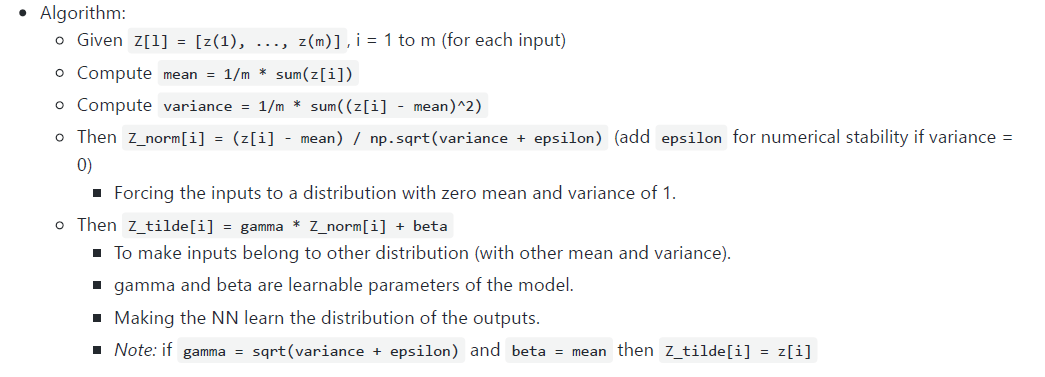

  + in addition to normalizing z, there is an extra step to generate `Z_n[l]` based on normalized `Z[l'` with two extra parameters, gamma and beta. The activation is based on `Z_n[l]`
  + if you use batch normalization, `b[l]` can be eliminated, the equations will be
    + `Z[l] = W[l]A[l-1], Z_norm = ..., Z_n[l] = gamma * Z_norm[l] + beta[l]`
    + the shapes are
      + `Z[l] - (n[l], m)
        beta[l] - (n[l], m)
        gamma[l] - (n[l], m)
        `
* Why does batch normalization work?
  + same as why we normalize X
  + reduces the problem of input values changing (shifting)
  + batch normalization does some regularization
    + each mini batch is scaled by the mean/variance computed of that min-batch
    + this asdds some noise to the values `Z[l]` within that mini batch. Similar to dropout it adds some noise to each hidden layer's activations. This has a slight regularization effect
    + using bigger size of the mini-batch you are reducing nosie and therefore regularization effect
    + don't rely on batch normalization as a regularization. It is intended for normalization of hidden units, activations and therefore speeding up learning. For regularization use other regularization techniques, such as L2 or dropout
    
* Batch normalization at test time
  + when we train a NN with batch normalization, we compute the mean and the variance of the mini-batch
  + In testing, we may need to process examples one at a time. THe mean and variance of one sample won't make sense
  + we have to compute an estimated value of mean and variance to use it in testing time
  + we can use the weighted average across the mini-batches
  + we will sue the estimated values of the mean and variance to test
  + this method is called "Running average"
  + In practice most often you wil use a deep learning framework and it will contain some default implementation of doing such a thing
  
#### Softmax Regression
* Softmax is a generalization of logistic regression. It is used for multiclass classification / regression
* for classification problems, we can encode the output classes using one-hot encoding. For example, a classifier that can classify the images to dog, cat, baby chick or none (4 classes) can have its y variable labeled and encoded as:
`To represent a dog vector y = [0 1 0 0]
To represent a cat vector y = [0 0 1 0]
To represent a baby chick vector y = [0 0 0 1]
To represent a none vector y = [1 0 0 0]`

* The output of softmax will be a vector containing 4 elements, each corresponds to the probability that the object in the image belong to none, dog, cat or baby chick.
* softmax activation is shown below:
`t = e^(Z[L]) # shape(C, m)
A[L] = e^(Z[L]) / sum(t) # shape(C, m), sum(t) - sum of t's for each example (shape (1, m))
`

In [3]:
import tensorflow as tf
import numpy as np

## ML Strategy

### ML Strategy 1

#### Why ML Strategy
* You have a lot of ideas for how to improve the accuracy of your deep learning system:
  + Collect more data.
  + Collect more diverse training set.
  + Train algorithm longer with gradient descent.
  + Try different optimization algorithm (e.g. Adam).
  + Try bigger network.
  + Try smaller network.
  + Try dropout.
  + Add L2 regularization.
  + Change network architecture (activation functions, # of hidden units, etc.)
* It will be useful to have some strategies to analyze the problem to go in a direction that will help you get better results

#### Orthogonalization
* some deep learning developers know exactly what hyperparameter to tune in order to achieve one effect. This is a process we call orthogonalization
* In orthogonalization, you have some controls, and each control does a specific task and doesn't affect other controls.
* For a supervised learning system to do well, you need to tune your system to make sure four things hold true - chain of assumptions in machine learning
  + fit training dataset well on cost function (near human level performance if possible)
    + try bigger network, another optimization algorithm (like Adam)
  + fit dev set well on cost function
    + use regularization, or a bigger training set to make it generalize better
  + fit test set well on cost function
    + try bigger dev set
  + peforms well in real world
    + try change dev set to have the same distribution as real world data, or change cost function
    
#### Signle number evaluation metric
* Its better and faster to set a single number evaluation metric for your project before staring it
* One example is that either precision or recall tells you the whole story to evaluate a classifier, we can set up a single number metrics, such as F1 score to combine these two for a full evaluation of the classifier.
`F1 = 2 / ((1/P) + (1/R))` P and R are precision and recall, respectively

#### Satisfying and Optimizing metric
* if you have multiple criteria to achieve, for example, predictive performance evaluated as F1 score, and the running time to be controlled within a certain time period, you can define a single optimization metric, with other multiple satisfying metrics. For example, maximize F1 score, subject to running time < 100 ms. The general rule is in the form of
``` python
    Maximize 1    # optimizing metric (one optimizing metric)
    subject to N-1  # satisficing metric (N-1 satisficing metrics)
```

#### When to change dev/test sets and metrics
* the basic concept is to apply orthogonalization principle by breaking a machine learning problem into distinct steps
  + first, figure out how to define a metric that cpatures what you want to do - place the target
  + second, worry about how to actually do well on this metric - how to aim/shoot accurately at the target
  + if you are doing well on your metric, but dev/test set doesn't correspond to doing well, change your metric and/or dev/test set
  + the sreen-shot below shows an example to reduce the porn pictures that were mis-classified by models. The purpose is to specifically reduce the false positive of porn images being misclassifed as cat images. We can do this by re-setting the metric in cost function to dramatically increase the penalty of false positives of porn images in the cost function metric
  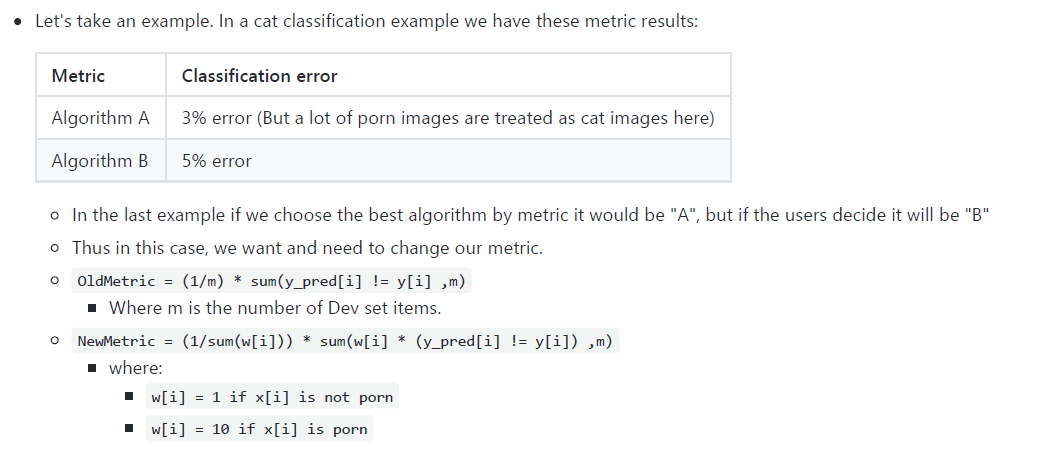
  
#### Why human-level performance?
* We compare to human-level performance because of two main reasons:
  + because of advances in deep learning, macine learning algorithms are suddenly working much better and so it has become much more feasible in a lot of application areas for machine learning algorithms t actually become competitive with human-level performance
  + it turns out that the workflow of designing and building a machine learning system is much more efficient when you are trying to do something that humans can also do
* After an algorithm reaches the human level performance, the progress and accuracy slow down
* You won't surpass Bayes optimal error using machine learning algorithms unless you are overfitting, and there isn't much error range between human-level error and Bayes optimal eror
* humans are quite good at a lot of tasks. As long as machine learning is worse than humans, you can
  + get labeled data from humans
  + gain insight from manual error analysis: why did a person get it right?
  + better analysis of bias/variance
    + if the training error is much worse than human level error, then we will focus on bias
    + if the training error is close to human level error, we will focus on reducing variance
    + avoidable bias = training error - Human (Bayes) error
    + variance = dev error - training error
* Deep learning has surpassed human level performance mostly in non natrual perception tasks, such as
  + online advertising
  + product recommendation
  + loan approval
  + it is harder for machines to surpass human-level performance in natural perception tasks, like computer vision and speech recognition

#### Improving model performance
* if avoidable bias is large you have these options
  + Train bigger model
  + train longer/better optimization algorithm (like momentum, RMSprop, Adam)
  + find better NN architecture/hyperparameters search
* if variance is large, you have these options
  + get more training data
  + regularization (L2, dropout, data augmentation)
  + find better NN architecture/hyperparameters search
  

### ML Strategy 2

#### Carrying out error analysis
* Error analysis - process of manually examing mistakes that your algorithm is making. It can give you insights into what to do next. For example
  + In the cat classification example, if you have 10% error on your dev set and you want to decrease the error.
  + You discovered that some of the mislabeled data are dog pictures that look like cats. Should you try to make your cat classifier do better on dogs (this could take some weeks)?
  
* Error analysis approach
  + get 100 mislabeled dev set examples at random
  + count up how many are dogs
  + if 5 of 100 are dogs then improving your classifier on dog identification will decrease your error up to 9.5% (ceiling), which can be too little
  + if 50 of 100 are dogs then you could decrease your error up to 5%, which is reasonable and you should work on that
* you can also get the distribution of the mislabled images and decide whcih large categories of mislabeling to improve in order to improve the overall performance
* This quick counting procedure, which you can often do with only small numbers of hours, can really help you make much better prioritization decisions, and understand how promising different approaches are to work on
* find out if train and dev/test data are from the same distribution. It is critical to have dev and test sets coming from the same distribution, but it could be OK for a train set to come from slightly different distribution

* Build your first system quickly, then iterate
  + the steps you take to make your deep learning project:
    + setup dev/test set and metric
    + build initial system quickly
    + use bias/variance analysis and error analysis to prioritize next steps
    
#### What to do if training sets have different distribution from dev/test dataset?

* how to define train, dev/test datasets?
  + take some of the dev/test set examples and add them to training set. By doing this, the distribution you care about is your target. Although the distributions in training and dev/test are now different, you will get a better performance over a long term
  + if you mix and shuffle all data from train and dev/test sets and extract randomly training and dev/test sets, you will have the same distribution for train, and dev/test sets, but you lose the real world data distribution in dev/test set
  
* bias and variance with mismatched data distributions
  + if you get a good train error (1%) with a bad dev error (10%), you might conclude that the model has a high variance, but that could be wrong since the high dev error may be caused by the different distribution of dev set from train set
  + to solve this, we can build another train-dev set using examples randomly selected from train set. If train-dev set has a high error, we know the model has a high variance, but if train-dev has a low error, the high error level is caused by the differnt distribution of dev set from train set
  + another way to identify the data mismatch is by manual error analysis, and try to understand the difference between training and dev/test sets
  + once there is a difference in the distributions of train and dev sets, we can make the training data more similar to dev set (for example, by artificial data synthesis), or collect more data similar to dev/test set
  
#### Transfer learning
* apply the knowledge you took in task A and apply it to another task B
* For example, you have trained a cat classifier with a lot of data, you can use the part of the trained NN to solve x-ray classification problem
* To do transfer learning, delete the last layer of NN and it's weights and:
  + i. Option 1: if you have a small data set - keep all the other weights as a fixed weights. Add a new last layer(-s) and
initialize the new layer weights and feed the new data to the NN and learn the new weights.
  + ii. Option 2: if you have enough data you can retrain all the weights.
* Option 1 and 2 are called fine-tuning and training on task A called pretraining.
* When transfer learning make sense:
  + Task A and B have the same input X (e.g. image, audio).
  + You have a lot of data for the task A you are transferring from and relatively less data for the task B your transferring to.
  + Low level features from task A could be helpful for learning task B.
  
#### Multi-task learning
  * Whereas in transfer learning, you have a sequential process where you learn from task A and then transfer that to task B. In multi-task learning, you start off simultaneously, trying to have one neural network do several things at the same time. 
  * we do this in the hope that each of the tasks helps can all of the other tasks.
  * One example is to build an object recognition system that detects pedestrians, cars, stop signs, and traffic lights
    + image has multiple labels, and Y shape will be (4,m) because we have 4 classes and each one is a binary one.
    + `Cost = (1/m) * sum(sum(L(y_hat(i)_j, y(i)_j)))`, i = 1..m, j = 1..4 , where `L = - y(i)_j * log(y_hat(i)_j) - (1 - y(i)_j) * log(1 - y_hat(i)_j)`
    + In the last example you could have trained 4 neural networks separately but if some of the earlier features in neural network can be shared between these different types of objects, then you find that training one neural network to do four things results in better performance than training 4 completely separate neural networks to do the four tasks separately.
  * Multi-task learning will also work if y isn't complete for some labels. 
    +  `Y = [1 ? 1 ...]
            [0 0 1 ...]
            [? 1 ? ...]`
    + in this case it will do good with the missing data, just the loss function will be different:
      `Loss = (1/m) * sum(sum(L(y_hat(i)_j, y(i)_j) for all j which y(i)_j != ?))`
* When to use Multi-task learning makes sense:
   + Training on a set of tasks that could benefit from having shared lower-level features.
   + Usually, amount of data you have for each task is quite similar.
   + Can train a big enough network to do well on all the tasks.
* If you can train a big enough NN, the performance of the multi-task learning compared to splitting the tasks is better.
* Today transfer learning is used more often than multi-task learning.

#### End-to-end deep learning
* some systems have multiple stages to implement. An end-to-end deep learning system implement all these stages with a single NN
* compared to non end-to-end system, 
  + end-to-end system gives data more freedom, and we can directly get the results in one step by skiping the steps in the middle.
  + end-to-end systems require more data. If we don't have enough data, we usually implement the non end-to-end systems.
* example 1 (speech recognition system)
   `
  Audio ---> Features --> Phonemes --> Words --> Transcript # non-end-to-end system
  Audio ---------------------------------------> Transcript # end-to-end deep learning system
  `
* example 2 (face recognition system)
  + due to the restrictions on the amount of picture available, non end-to-end system is used
  + in the non end-to-end implementation, the NN takes two faces as an input and outputs if the two faces are the same person or not
  `
  Image ---------------------> Face recognition # end-to-end deep learning system
  Image --> Face detection --> Face recognition # deep learning system - best approach for now
  `
  
* example 3 (machine learning translation) 
  + end-to-end deep learning system works better because we have enough data to build it
  `
  English --> Text analysis --> ... --> French # non-end-to-end system
  English ----------------------------> French # end-to-end deep learning system - best approach
  `
  
* example 4 (estimate child's age from x-ray picture of a hand)
  + non end-to-end system works better because we don't have enough data to train end-to-end system
  `
  Image --> Bones --> Age # non-end-to-end system - best approach for now
  Image ------------> Age # end-to-end system
  `
  
* When to use end-to-end deep learning
  + Pros of end-to-end learning
    + let the data speak. By having a pure machine learning approach, your NN learning input from X to Y may be more able to capture whatever statistics are in the data, rather than being forced to reflect human perconceptions
    + less hand-designing of components needed
  + Cons of end-to-end deep learning
    + may need a large amount of data
    + excludes potentially useful hand-design components (it helps more on the smaller datasets)
  + apply end-to-end deep learning
    + key question: Do yu have sufficient data to learn a function of the complexity needed to map X to Y?
    + Use ML/DL to learn some individual components
    + When applying supervised learning you should carefully choose what types of X to Y mapping you want to learn depending on what task yu can get data for